<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Test-of-pyLDAvis-Widget" data-toc-modified-id="Test-of-pyLDAvis-Widget-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Test of pyLDAvis Widget</a></span><ul class="toc-item"><li><span><a href="#Do-Imports" data-toc-modified-id="Do-Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Do Imports</a></span></li><li><span><a href="#Test-the-widget" data-toc-modified-id="Test-the-widget-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test the widget</a></span></li></ul></li></ul></div>

# Test of pyLDAvis Widget

## Do Imports

In [2]:
%load_ext autoreload
%autoreload
%aimport Gensim.gensim_test
import importlib
importlib.reload(Gensim.gensim_test)
from Gensim.gensim_test import deriveSoftCosineSimilarityMatrix,test3DPlotOfCosineSimilarity ,showPyLDAvis, saveDFPickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%aimport reader
from reader import loadAllFeedsFromFile
%aimport topicmap
from topicmap import smallDict

## Test the widget

In [13]:
allDict=loadAllFeedsFromFile()
showPyLDAvis(smallDict(allDict,10), False, 30)

loading file:  rssreader/data\feed16052020_010028.pickle
loading file:  rssreader/data\feed16052020_124115.pickle
loading file:  rssreader/data\feed22052020_135635.pickle
loading file:  rssreader/data\feed22052020_173323.pickle




Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [22/May/2020 20:30:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2020 20:30:20] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2020 20:30:20] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [22/May/2020 20:30:21] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


ValueError: "Invalid object to show. The object to passed to show must be one of:

* a LayoutDOM (e.g. a Plot or Widget or Layout)
* a Bokeh Application
* a callable suitable to an application FunctionHandler


In [14]:
#importlib.import_module("samples.seabornScatterPlots") # TODO move to base directory, not samples
%aimport samples.seabornScatterPlots 
rom samples.seabornScatterPlots import displayTopics,displayAuthors,displayTags

With author: 2213 Without author: 799


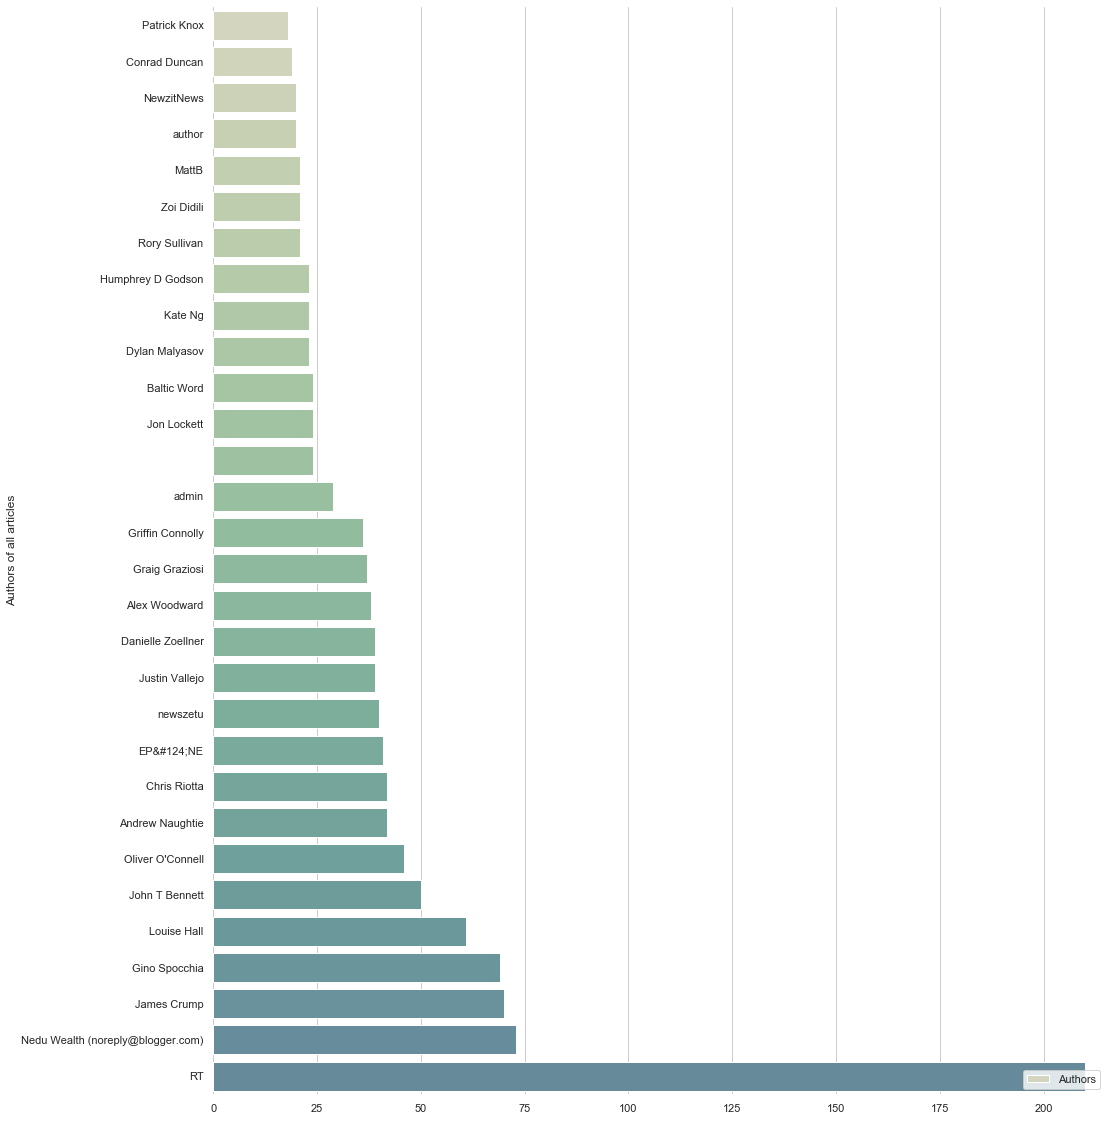

In [15]:
displayAuthors(dict=allDict)

In [63]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [65]:
def f(x):
    return x*3
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [42]:
import ipywidgets as widgets
import numpy as np
import ipyvolume as ipv
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
import pythreejs


In [71]:
import plotly.graph_objs as go
import numpy as np
#from ipywidgets import interact, interactive
from ipywidgets import widgets
from IPython.display import display

aSlider = widgets.FloatSlider(
    value=2.0,
    min=1.0,
    max=4.0,
    step=0.01,
    description='a:',
    continuous_update=False
)

bSlider = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=10.0,
    step=0.01,
    description='b:',
    continuous_update=True
)

colorDropdown = widgets.Dropdown(
    description='Color:',
    value='blue',
    options=['red', 'blue', 'green']
)

fig = go.FigureWidget()
#fig.show()
scattf = fig.add_scatter()
scatt = scattf.data[-1]

xs=np.linspace(0, 6, 100)

def response(change):
    with fig.batch_update():
        fig.data[0].x=xs
        fig.data[0].y=np.sin(aSlider.value*xs-bSlider.value)
        fig.data[0].line.color=colorDropdown.value
        fig.layout.xaxis.title = 'whatever'

aSlider.observe(response, names="value")
bSlider.observe(response, names="value")
colorDropdown.observe(response, names="value")

response("doesn't matter what I send here, just triggering") # MUST be before widgets.VBox - if response(x) is last, NOTHING is drawn! 

widgets.HBox([aSlider,
              bSlider,
              colorDropdown])
widgets.VBox([fig])

    'data': [{'line': {'color': 'blue'},
              'type': 'scatter',
      …

In [46]:
import pythreejs
import ipyvolume as ipv
import numpy as np
fig = ipv.figure()
scatter = ipv.scatter(x, y, z, marker='box')
ipv.show()

control = pythreejs.OrbitControls(controlling=fig.camera)
# assigning to fig.controls will overwrite the builtin controls
fig.controls = control
control.autoRotate = True
# the controls does not update itself, but if we toggle this setting, ipyvolume will update the controls
fig.render_continuous = True